### Introduction
This is an exploratory notebook for airbnb listings in Nairobi


In [487]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [488]:
# load data
listings = pd.read_json('../data/listings.json')

In [489]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          280 non-null    object 
 1   url            0 non-null      float64
 2   info           0 non-null      float64
 3   description    280 non-null    object 
 4   details        280 non-null    object 
 5   is_superhost   124 non-null    object 
 6   price          280 non-null    object 
 7   total_reviews  280 non-null    object 
 8   review_score   280 non-null    object 
dtypes: float64(2), object(7)
memory usage: 19.8+ KB


In [490]:
listings.head()

,title,url,info,description,details,is_superhost,price,total_reviews,review_score
0,Entire apartment in Nairobi,NaN,NaN,Cozy 2 bedroom near popular restaurant,"[4 guests, 2 bedrooms, 3 beds, 2.5 baths, Wifi...",SUPERHOST,[$52],[],[]
1,Entire apartment in Nairobi,NaN,NaN,Brookview Kilimani 1 Bedroom (Monthly),"[2 guests, 1 bedroom, 1 bed, 1 bath, Wifi, Kit...",SUPERHOST,[$22],[],[]
2,Entire guesthouse in Nairobi,NaN,NaN,"Kileleshwa, 1 bedroom private cottage","[2 guests, 1 bedroom, 2 beds, 1 bath, Wifi, Ki...",None,[$10],"[ (, 5, )]",[5.0]
3,Entire apartment in Nairobi,NaN,NaN,"Cozy studio with CBD view, Netflix + rooftop pool","[2 guests, Studio, 1 bed, 1 bath, Wifi, Kitche...",None,[$25],"[ (, 33, )]",[4.64]
4,Entire apartment in Nairobi,NaN,NaN,SkyView Top Studio,"[2 guests, Studio, 1 bed, 1 bath, Wifi, Kitche...",SUPERHOST,[$25],"[ (, 11, )]",[5.0]


In [491]:
# replace specific values
listings.at[31,'details']= ['2 guests', '1 bedroom','1 bed', '1 bath', 'Wifi']
listings.at[73,'details'] = ['2 guests', '1 bedroom','1 bed', '1 bath', 'Wifi','Kitchen']
listings.at[230,'details'] = ['2 guests', 'Studio','1 bed', '1 bath', 'Wifi','Kitchen','Free parking']
listings.at[260,'details'] = ['1 guest', '1 bedroom','1 bed', '1 shared bath', 'Wifi','Kitchen','Free parking']
listings.at[104,'details'] = ['2 guests', 'Studio', '2 beds', '1 bath', 'Wifi','','Free parking']
listings.at[106,'details'] = ['2 guests', '1 bedroom', '1 bed', '1 bath', 'Wifi','', 'Free parking']
listings.at[169,'details'] = ['2 guests', '1 bedroom', '1 bed', '1 bath', 'Wifi','', 'Free parking']
listings.at[271,'details'] = ['2 guests', 'Studio', '1 bed', '1 bath', 'Wifi','', 'Free parking']
listings.at[278,'details'] = ['2 guests', 'Studio', '1 bed', '1 bath', 'Wifi','', 'Free parking']

In [492]:
# check total number of amenities offered
listings['total_amenities'] = listings['details'].apply(len)

# cleanup
listings[['guests','bedrooms','beds','baths','wifi','kitchen','parking','pool']] = listings['details'].apply(pd.Series)
listings['price($)'] = listings['price'].apply(pd.Series)
listings['rating'] = listings['review_score'].apply(pd.Series)
listings[['x','reviews','y']] = listings['total_reviews'].apply(pd.Series)
listings['price($)'] = listings['price($)'].str.replace('$','')
listings['price($)'] = listings['price($)'].astype(int)
listings['is_superhost'] = np.where(listings['is_superhost']=='SUPERHOST','yes','no')
listings = listings.drop(['x','y'],axis=1)
listings['rating'] = np.where(listings['rating'].isna(),0,listings['rating'])
listings['reviews'] = np.where(listings['reviews'].isna(),0,listings['reviews'])

# cleanup
listings['guests'] = listings['guests'].str.replace(' guests| guest', '')
listings['bedrooms'] = listings['bedrooms'].str.replace(' bedrooms| bedroom','')
listings['beds'] = listings['beds'].str.replace(' beds|bed','')
listings['bedrooms'] = listings['bedrooms'].str.replace('Studio','0')
listings['baths'] = listings['baths'].str.replace(' baths| bath','')
listings['baths'] = listings['baths'].str.replace('Half-bath','0.5')
listings['shared_bath'] = np.where(listings['baths'].str.contains('shared'),'yes','no')
listings['baths'] = listings['baths'].str.replace(' shared| private','')
listings['wifi'] = np.where(listings['wifi']=='Wifi','yes','no')
listings['kitchen'] = np.where(listings['kitchen']=='Kitchen','yes','no')
listings['parking'] = np.where(listings['parking']=='Free parking','yes','no')
listings['pool'] = np.where(listings['pool']=='Pool','yes','no')


In [493]:
# select clean columns
clean_cols = ['title','description','is_superhost','guests',
 'bedrooms','beds','baths','wifi','kitchen','parking','pool',
 'price($)','rating','reviews','shared_bath']
listings_clean = listings[clean_cols]
listings_clean.head()

,title,description,is_superhost,guests,bedrooms,beds,baths,wifi,kitchen,parking,pool,price($),rating,reviews,shared_bath
0,Entire apartment in Nairobi,Cozy 2 bedroom near popular restaurant,yes,4,2,3,2.5,yes,yes,yes,no,52,0,0,no
1,Entire apartment in Nairobi,Brookview Kilimani 1 Bedroom (Monthly),yes,2,1,1,1,yes,yes,yes,yes,22,0,0,no
2,Entire guesthouse in Nairobi,"Kileleshwa, 1 bedroom private cottage",no,2,1,2,1,yes,yes,yes,no,10,5.0,5,no
3,Entire apartment in Nairobi,"Cozy studio with CBD view, Netflix + rooftop pool",no,2,0,1,1,yes,yes,yes,yes,25,4.64,33,no
4,Entire apartment in Nairobi,SkyView Top Studio,yes,2,0,1,1,yes,yes,yes,no,25,5.0,11,no


In [494]:
# prices overview
listings_clean['price($)'].describe()

count    280.000000
mean      32.207143
std       16.548396
min        8.000000
25%       21.000000
50%       28.000000
75%       40.250000
max      101.000000
Name: price($), dtype: float64

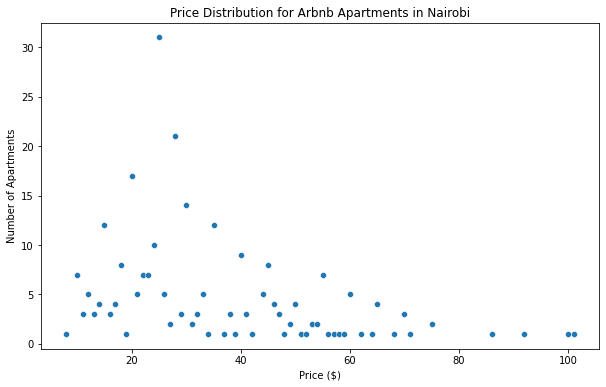

In [495]:
# plot price distribution
price_distribution = pd.DataFrame(listings_clean['price($)'].value_counts().reset_index())
price_distribution.columns =['price','total']
price_distribution = price_distribution.sort_values(by='price',ascending=True)
fig,ax = plt.subplots(figsize=(10,6))
# price_distribution.plot(kind='scatter',ax=ax)
sns.scatterplot(x='price', y='total',
            ci=None,
            palette="Blues_d",
#             orient='v',
            data=price_distribution)
ax.set_xlabel('Price ($)')
ax.set_ylabel('Number of Apartments')
plt.title('Price Distribution for Arbnb Apartments in Nairobi')
plt.show()

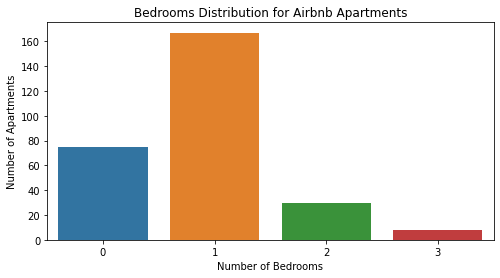

In [496]:
# distribution by bedrooms
bedrooms_distribution = listings_clean['bedrooms'].value_counts().reset_index()
bedrooms_distribution.columns = ['bedrooms','total']
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(x='bedrooms',y='total',order=['0','1','2','3'],data=bedrooms_distribution)

ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Number of Apartments')
plt.title('Bedrooms Distribution for Airbnb Apartments')
plt.show()

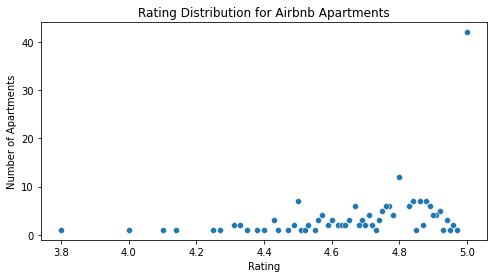

In [497]:
# distribution by bedrooms
rating_distribution = listings_clean['rating'].value_counts().reset_index()
rating_distribution.columns = ['rating','total']
rating_distribution['rating'] = rating_distribution['rating'].astype(float)
rating_distribution = rating_distribution[rating_distribution['rating']>0]
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x='rating',y='total',data=rating_distribution)

ax.set_xlabel('Rating')
ax.set_ylabel('Number of Apartments')
plt.title('Rating Distribution for Airbnb Apartments')
plt.show()

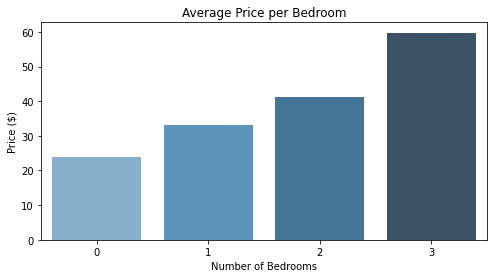

In [498]:
# let's check average prices per bedrooms
avg_price_per_bedroom = listings_clean.groupby('bedrooms')['price($)'].mean().rename('price').reset_index()

fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(x='bedrooms',y='price',palette='Blues_d',order=['0','1','2','3'],data=avg_price_per_bedroom)

ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Price ($)')
plt.title('Average Price per Bedroom')
plt.show()

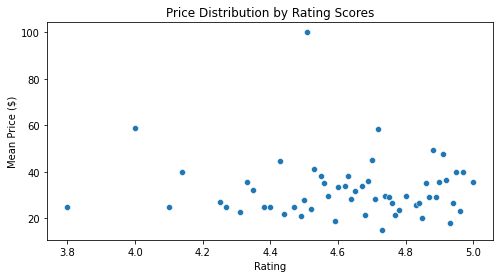

In [499]:
rating_greater_than_zero = listings_clean.copy()
rating_greater_than_zero['rating'] = rating_greater_than_zero['rating'].astype(float)
rating_greater_than_zero = rating_greater_than_zero[rating_greater_than_zero['rating']>0]

rating_distribution = rating_greater_than_zero.groupby('rating')['price($)'].mean().rename('price').reset_index()

fig,ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x='rating',y='price',data=rating_distribution)
ax.set_xlabel('Rating')
ax.set_ylabel('Mean Price ($)')
plt.title('Price Distribution by Rating Scores')

plt.show()

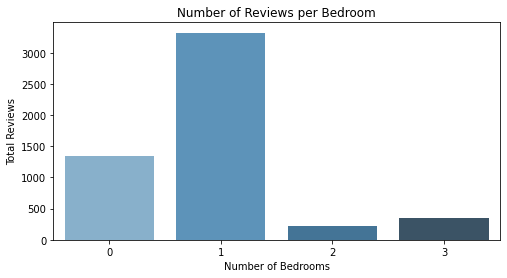

In [500]:
rating_greater_than_zero['reviews'] = rating_greater_than_zero['reviews'].astype(int)
reviews_summary = rating_greater_than_zero.groupby('bedrooms')['reviews'].sum().rename('total').reset_index()

fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(x='bedrooms',y='total',palette='Blues_d',order=['0','1','2','3'],data=reviews_summary)

ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Total Reviews')
plt.title('Number of Reviews per Bedroom')
plt.show()

In [501]:
listings_clean.rename(columns={'price($)':'price'},inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [502]:
listings_clean.head()

,title,description,is_superhost,guests,bedrooms,beds,baths,wifi,kitchen,parking,pool,price,rating,reviews,shared_bath
0,Entire apartment in Nairobi,Cozy 2 bedroom near popular restaurant,yes,4,2,3,2.5,yes,yes,yes,no,52,0,0,no
1,Entire apartment in Nairobi,Brookview Kilimani 1 Bedroom (Monthly),yes,2,1,1,1,yes,yes,yes,yes,22,0,0,no
2,Entire guesthouse in Nairobi,"Kileleshwa, 1 bedroom private cottage",no,2,1,2,1,yes,yes,yes,no,10,5.0,5,no
3,Entire apartment in Nairobi,"Cozy studio with CBD view, Netflix + rooftop pool",no,2,0,1,1,yes,yes,yes,yes,25,4.64,33,no
4,Entire apartment in Nairobi,SkyView Top Studio,yes,2,0,1,1,yes,yes,yes,no,25,5.0,11,no


In [503]:
listings_final = listings_clean.drop(['title','description'],axis=1)
listings_final['reviews'] = listings_final['reviews'].astype(int)
listings_final['rating'] = listings_final['rating'].astype(float)
listings_final['guests'] = listings_final['guests'].astype(int)
listings_final.head()

,is_superhost,guests,bedrooms,beds,baths,wifi,kitchen,parking,pool,price,rating,reviews,shared_bath
0,yes,4,2,3,2.5,yes,yes,yes,no,52,0.00,0,no
1,yes,2,1,1,1,yes,yes,yes,yes,22,0.00,0,no
2,no,2,1,2,1,yes,yes,yes,no,10,5.00,5,no
3,no,2,0,1,1,yes,yes,yes,yes,25,4.64,33,no
4,yes,2,0,1,1,yes,yes,yes,no,25,5.00,11,no


In [504]:
# check final dataset
listings_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_superhost  280 non-null    object 
 1   guests        280 non-null    int64  
 2   bedrooms      280 non-null    object 
 3   beds          280 non-null    object 
 4   baths         280 non-null    object 
 5   wifi          280 non-null    object 
 6   kitchen       280 non-null    object 
 7   parking       280 non-null    object 
 8   pool          280 non-null    object 
 9   price         280 non-null    int64  
 10  rating        280 non-null    float64
 11  reviews       280 non-null    int64  
 12  shared_bath   280 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 28.6+ KB


In [505]:
listings_ml = pd.get_dummies(listings_final)

In [506]:
listings_ml.head()

,guests,price,rating,reviews,is_superhost_no,is_superhost_yes,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,...,baths_4,wifi_yes,kitchen_no,kitchen_yes,parking_no,parking_yes,pool_no,pool_yes,shared_bath_no,shared_bath_yes
0,4,52,0.00,0,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
1,2,22,0.00,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
2,2,10,5.00,5,1,0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
3,2,25,4.64,33,1,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,2,25,5.00,11,0,1,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0


## 2. Machine Learning

In [507]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [508]:
# split the data into training 
# & validation set

# generate random indices
val = 0.1
len_dataset = len(listings_ml)
val_indices = [x for x in np.random.randint(0, len_dataset,int(val*len_dataset))]
print(val_indices)

# split the dataset based on indices
validation = listings_ml.loc[listings_ml.index.isin(val_indices)]
train = listings_ml.loc[~listings_ml.index.isin(val_indices)]
validation.head()

[92, 140, 260, 198, 266, 164, 167, 193, 32, 220, 127, 185, 231, 112, 128, 38, 232, 246, 277, 241, 168, 86, 247, 21, 238, 111, 131, 136]


,guests,price,rating,reviews,is_superhost_no,is_superhost_yes,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,...,baths_4,wifi_yes,kitchen_no,kitchen_yes,parking_no,parking_yes,pool_no,pool_yes,shared_bath_no,shared_bath_yes
21,6,41,5.00,6,1,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
32,6,35,4.89,27,0,1,0,0,0,1,...,0,1,0,1,0,1,1,0,1,0
38,2,25,4.40,35,1,0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
86,3,25,4.80,5,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
92,2,28,4.96,47,0,1,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0


In [509]:
train.head()

,guests,price,rating,reviews,is_superhost_no,is_superhost_yes,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,...,baths_4,wifi_yes,kitchen_no,kitchen_yes,parking_no,parking_yes,pool_no,pool_yes,shared_bath_no,shared_bath_yes
0,4,52,0.00,0,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
1,2,22,0.00,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
2,2,10,5.00,5,1,0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
3,2,25,4.64,33,1,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,2,25,5.00,11,0,1,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0


In [510]:
print("Train Set: ",len(train),"Test Set: ", len(validation))

Train Set:  252 Test Set:  28


In [511]:
# validation set
val_test = validation.drop('price',axis=1)
val_actual = validation['price']

# train data into train & test sets
train = train.reset_index(drop=True)
X = train.drop('price',axis=1)
y = train['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [512]:
# # scale the data
# Sc_X = StandardScaler()
# Sc_y = StandardScaler()
# X_train = Sc_X.fit_transform(X_train) 
# y_train = Sc_y.fit_transform(y_train.values.reshape(-1,1)) 
# X_test = Sc_X.fit_transform(X_test) 
# y_test = Sc_y.fit_transform(y_test.values.reshape(-1,1)) 

In [513]:
# train rf model
rf_model = RandomForestRegressor(n_estimators=100,criterion='mse',verbose=0)
rg_model = DecisionTreeRegressor(max_depth=5)
svm_model = SVR()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)
linear_model = LinearRegression()
gbr_model = GradientBoostingRegressor(max_depth=3,n_estimators=100,learning_rate=0.001)
xgb_model = xgboost.XGBRegressor()

model_scores = []

models = [rf_model, rg_model, svm_model,
          lasso_model,ridge_model,linear_model,
         gbr_model,xgb_model]
for model in models:
    model_score = {}
    model_score['Model'] = str(model).split('(')[0]
    
    fit_model = model.fit(X_train,y_train)            # fit model
    
    y_pred = fit_model.predict(X_test)                # test performance on test set
    mse = round(mean_squared_error(y_pred,y_test),2)
    rmse = round(mse**0.5,2)
    model_score['test_mse']= mse
    model_score['test_rmse']= rmse
    
    val_pred = model.predict(val_test)                 # test performance on validation set
    mse_val = round(mean_squared_error(val_actual,val_pred),2)
    rmse_val = round(mse_val**0.5,2)
    model_score['validation_mse'] = mse_val
    model_score['validation rmse'] = rmse_val
    
    model_scores.append(model_score)                  # add model result to scores list

    
model_scores_df = pd.DataFrame(model_scores)
# print(model_scores_df)
model_scores_df

,Model,test_mse,test_rmse,validation_mse,validation rmse
0,RandomForestRegressor,301.36,17.36,89.27,9.45
1,DecisionTreeRegressor,340.05,18.44,210.35,14.50
2,SVR,406.46,20.16,158.15,12.58
3,Lasso,303.16,17.41,88.32,9.40
4,Ridge,314.28,17.73,94.64,9.73
5,LinearRegression,315.39,17.76,94.68,9.73
6,GradientBoostingRegressor,347.35,18.64,120.70,10.99
7,XGBRegressor,359.31,18.96,119.56,10.93


In [514]:
# y_train.values
# import xgboost

In [515]:
# plt.figure()
# plt.plot(rf_model.decision_path(X_train))# plt.show()

In [516]:
# rf_model.decision_path(y_train)

In [517]:
# x_1 = np.arange(min(y_train),max(y_train),0.1)

In [518]:
# x1_grid = x_1.reshape(len(x_1),1)

In [519]:
# plt.plot(x1_grid,rf_model.predict(x1_grid))